<h1> Prediction Ford Car Price Using Model Machine Learning Linear Regression<h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

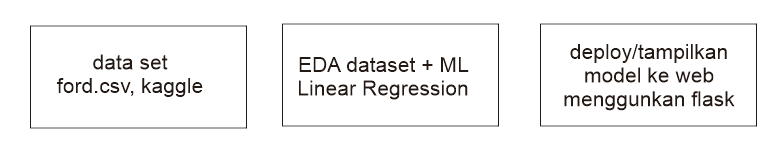

# import library and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/ford.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


#  Exploratory data analysis

In [ ]:
#data summary for price atribut 

data.price.describe()

count    17965.000000
mean     12279.756415
std       4741.382606
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

In [ ]:
# sort start from 10 high price
data.sort_values('price', ascending=True).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17103,Focus,2003,495,Manual,177644,Petrol,200,41.5,1.6
16904,Focus,2005,675,Manual,121000,Petrol,235,39.8,2.0
14222,Mondeo,2005,675,Manual,97000,Diesel,205,48.7,2.0
16811,Mondeo,2005,675,Manual,108000,Petrol,260,36.2,1.8
16704,Fiesta,2008,694,Manual,82020,Petrol,145,47.1,1.2
17248,KA,2008,795,Manual,76000,Petrol,205,43.5,1.3
17436,Focus,2005,795,Manual,71214,Petrol,200,42.1,1.6
17371,KA,2008,850,Manual,77000,Petrol,195,43.5,1.3
14367,Mondeo,2002,895,Manual,136784,Petrol,300,36.2,1.8
16907,Fiesta,2004,950,Manual,74000,Petrol,160,45.6,1.2


In [ ]:
# sort start from 10 low price
data.sort_values('price', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11912,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3
11913,Mustang,2017,49999,Manual,21575,Petrol,145,20.9,5.0
11910,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0
17866,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0
12613,Mustang,2019,45250,Automatic,2500,Petrol,145,22.1,5.0
10901,Mustang,2020,42999,Manual,10,Petrol,145,23.7,5.0
12996,Mustang,2019,42500,Automatic,226,Petrol,145,22.1,5.0
302,Mustang,2020,42489,Automatic,3500,Petrol,145,22.1,5.0
13431,Mustang,2019,42000,Semi-Auto,756,Petrol,150,22.6,5.0
12600,Mustang,2020,41000,Manual,100,Petrol,145,22.8,5.0


In [ ]:
# other model
data['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Escort                      1
 Ranger                      1
 Transit Tourneo             1
Name: model, dtype: int64

cek dimensi dataset ? terdapat 10668 baris dan 9 kolom

In [ ]:
data.shape

(17965, 9)

cek missing value, cek tipe data, dan cek atribut-atribut

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

melihat ada berapa versi mobil audi 

In [ ]:
data.groupby('model')['price','mileage','tax'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,mileage,tax
model,,,
0,2942072,9986766,32290
1,5383610,15452140,38940
2,14286664,18824989,155840
3,4744584,4528055,32635
4,3000,50000,265
5,66857126,142183089,661455
6,60496831,108897439,509985
7,40893,1054221,2940
8,4067947,7522850,33255


In [ ]:
data['model'].value_counts().count()

23

In [ ]:
data['mpg'].value_counts()

65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     961
        ... 
37.1       1
28.0       1
32.1       1
69.0       1
23.7       1
Name: mpg, Length: 90, dtype: int64

In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


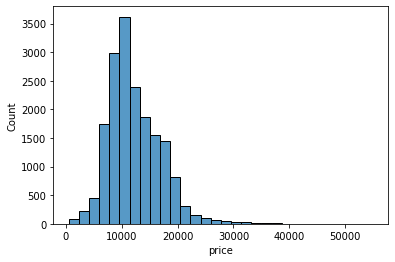

In [ ]:
sns.histplot(data['price'], bins=30)

- price/harga dengan rata - rata paling banyak di jual di pasaran US yaitu terdapat pada mobil dengan harga 10000 

In [ ]:
def plot_numerical(feature):
    ax = sns.lmplot(x=feature, y='price', data=data)
    ax.set_xticklabels(rotation=85)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['price'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # plot bars for min, median and mean cars price
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('price', fontsize=15)
    ax1.set_title(feature, fontsize=18)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=85)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=15)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

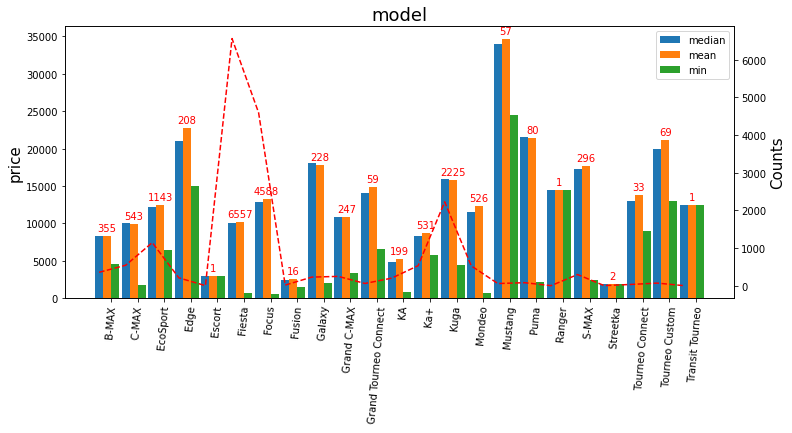

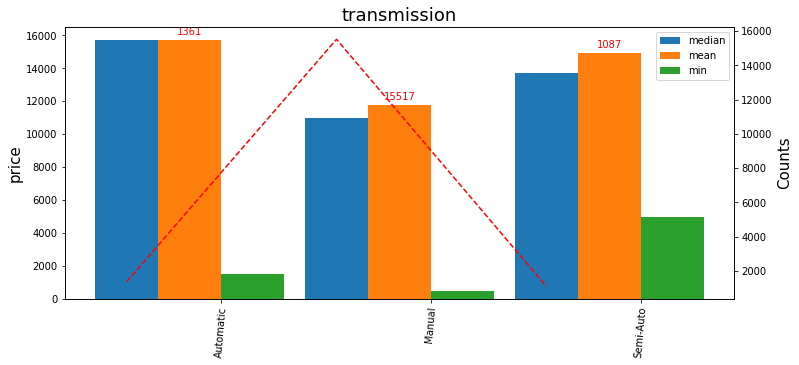

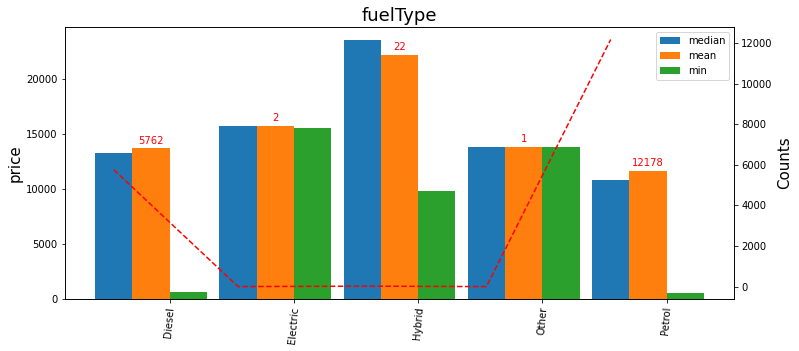

In [ ]:
for feature in ['model','transmission', 'fuelType']:
    plot_categorical(feature)

# Analysis and Data Prerocessing

In [ ]:
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()

encode.fit(data.transmission.drop_duplicates())
data.transmission = encode.transform(data.transmission)

encode.fit(data.fuelType.drop_duplicates())
data.fuelType = encode.transform(data.fuelType)

encode.fit(data.model.drop_duplicates())
data.model = encode.transform(data.model)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  int64  
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  int64  
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  int64  
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [ ]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,5,2016,7999,1,31348,4,125,54.3,1.2
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6


In [ ]:
data.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.030460,0.315072,-0.063433,0.079013,-0.389039,0.183914,-0.222055,0.500782
year,0.030460,1.000000,0.635994,-0.017119,-0.707899,0.087992,0.298457,-0.022969,-0.137358
price,0.315072,0.635994,1.000000,-0.058033,-0.530727,-0.202829,0.406821,-0.346427,0.411156
transmission,-0.063433,-0.017119,-0.058033,1.000000,0.016651,-0.005118,-0.053305,0.056084,-0.026485
mileage,0.079013,-0.707899,-0.530727,0.016651,1.000000,-0.257531,-0.260550,0.120077,0.215001
fuelType,-0.389039,0.087992,-0.202829,-0.005118,-0.257531,1.000000,0.129652,-0.297799,-0.644609
tax,0.183914,0.298457,0.406821,-0.053305,-0.260550,0.129652,1.000000,-0.503013,0.184311
mpg,-0.222055,-0.022969,-0.346427,0.056084,0.120077,-0.297799,-0.503013,1.000000,-0.260527
engineSize,0.500782,-0.137358,0.411156,-0.026485,0.215001,-0.644609,0.184311,-0.260527,1.000000


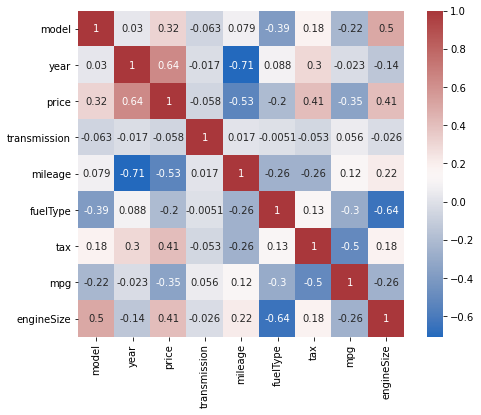

In [ ]:
plt.figure(figsize = (8,6))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'vlag', square = True, annot = True)

Corelasi :
- (+) = (year,price),(price,tax),(price,engine), (modelxprice)
- (-) = milage, mpg
- tidak ada korelasi = transsmision,fulltype


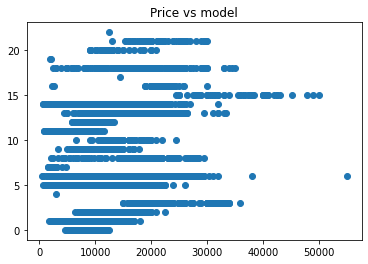

In [ ]:
plt.scatter(x= "price", y="model", data=data)
plt.title("Price vs model")
plt.show()

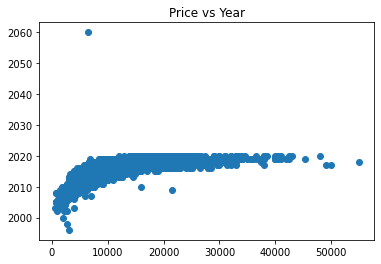

In [ ]:
plt.scatter(x= "price", y="year", data=data)
plt.title("Price vs Year")
plt.show()

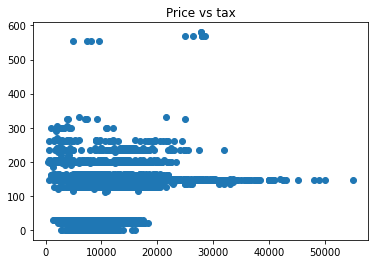

In [ ]:
plt.scatter(x= "price", y="tax", data=data)
plt.title("Price vs tax")
plt.show()

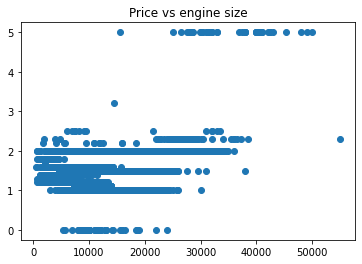

In [ ]:
plt.scatter(x= "price", y="engineSize", data=data)
plt.title("Price vs engine size")
plt.show()

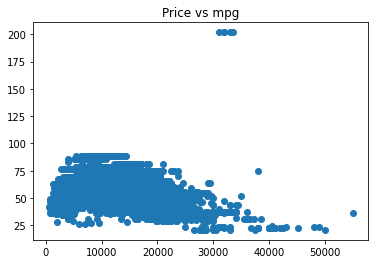

In [ ]:
plt.scatter(x= "price", y="mpg", data=data)
plt.title("Price vs mpg")
plt.show()

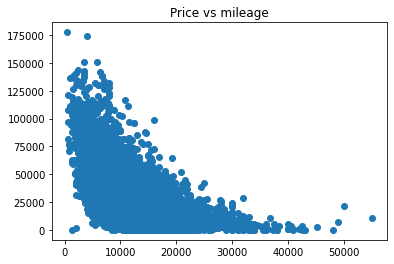

In [ ]:
plt.scatter(x= "price", y="mileage", data=data)
plt.title("Price vs mileage")
plt.show()

In [ ]:
data1 = data.drop(columns=['fuelType','transmission'], inplace=True)
data1

In [ ]:
data1 = data
data1

,model,year,price,mileage,tax,mpg,engineSize
0,5,2017,12000,15944,150,57.7,1.0
1,6,2018,14000,9083,150,57.7,1.0
2,6,2017,13000,12456,150,57.7,1.0
3,5,2019,17500,10460,145,40.3,1.5
4,5,2019,16500,1482,145,48.7,1.0
...,...,...,...,...,...,...,...
17960,5,2016,7999,31348,125,54.3,1.2
17961,0,2017,8999,16700,150,47.1,1.4
17962,0,2014,7499,40700,30,57.7,1.0
17963,6,2015,9999,7010,20,67.3,1.6


# Data Preprocessing

In [ ]:
nw_data = data1[['model','year','mileage','tax','mpg','engineSize','price']]
nw_data

,model,year,mileage,tax,mpg,engineSize,price
0,5,2017,15944,150,57.7,1.0,12000
1,6,2018,9083,150,57.7,1.0,14000
2,6,2017,12456,150,57.7,1.0,13000
3,5,2019,10460,145,40.3,1.5,17500
4,5,2019,1482,145,48.7,1.0,16500
...,...,...,...,...,...,...,...
17960,5,2016,31348,125,54.3,1.2,7999
17961,0,2017,16700,150,47.1,1.4,8999
17962,0,2014,40700,30,57.7,1.0,7499
17963,6,2015,7010,20,67.3,1.6,9999


In [ ]:
x = nw_data.iloc[:, 0:6]
y = nw_data.iloc[:, -1]

In [ ]:
x

,model,year,mileage,tax,mpg,engineSize
0,5,2017,15944,150,57.7,1.0
1,6,2018,9083,150,57.7,1.0
2,6,2017,12456,150,57.7,1.0
3,5,2019,10460,145,40.3,1.5
4,5,2019,1482,145,48.7,1.0
...,...,...,...,...,...,...
17960,5,2016,31348,125,54.3,1.2
17961,0,2017,16700,150,47.1,1.4
17962,0,2014,40700,30,57.7,1.0
17963,6,2015,7010,20,67.3,1.6


In [ ]:
y=pd.DataFrame(y)
y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17960,7999
17961,8999
17962,7499
17963,9999


# Building Model and Result Model

In [ ]:
# percobaan 1
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("=======================percobaan 1=======================")
print("Data train x :",xTrain.shape," Data Test x: ", xTest.shape)
print("Data Train y: ",yTrain.shape," Data Test y: ", yTest.shape)
print(" ")


=======================percobaan 1=======================
Data train x : (14372, 6)  Data Test x:  (3593, 6)
Data Train y:  (14372, 1)  Data Test y:  (3593, 1)
 


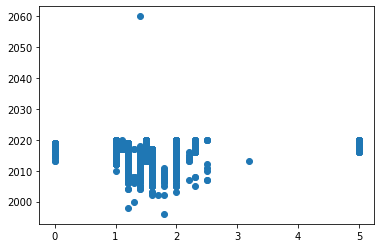

In [ ]:
# data was will train
plt.scatter(xTrain.iloc[:,5], xTrain.iloc[:, 1], cmap='winter')

In [ ]:
# model linear regression

from sklearn import linear_model
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(xTrain, yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# score model linear regression
pred = lr.predict(xTest)
print('Linear Regression Score: ', lr.score(xTest,yTest))

Linear Regression Score:  0.7393091730478669


In [ ]:
print("intercept : ", lr.intercept_)
print("Slop/Koefesien : ",lr.coef_)

intercept :  [-2333772.24787723]
Slop/Koefesien :  [[ 5.70507433e+01  1.16254912e+03 -6.17806808e-02  7.65152095e-01
  -7.78601197e+01  5.04369459e+03]]


In [ ]:
print(pred)

[[11670.23987821]
 [10555.58403924]
 [12665.91544267]
 ...
 [11762.65033933]
 [12668.34754063]
 [ 4908.54023474]]


In [ ]:
print(pred.round(decimals=-1))

[[11670.]
 [10560.]
 [12670.]
 ...
 [11760.]
 [12670.]
 [ 4910.]]


In [ ]:
dat= pd.DataFrame(pred)
dat.replace

,0
0,11670.239878
1,10555.584039
2,12665.915443
3,14515.925655
4,16363.888661
...,...
3588,12766.971191
3589,13949.207268
3590,11762.650339
3591,12668.347541


# Validasi Model

In [ ]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
X = nw_data[['model','year','mileage','tax','mpg','engineSize']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(nw_data['price'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     8021.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:36:10   Log-Likelihood:            -1.6584e+05
No. Observations:               17965   AIC:                         3.317e+05
Df Residuals:                   17958   BIC:                         3.318e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.409e+06   2.68e+04    -89.896      0.0

In [ ]:
nw_data['car_price_pred'] = olsmod.predict(X)
nw_data['residual'] = olsmod.resid
nw_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,model,year,mileage,tax,mpg,engineSize,price,car_price_pred,residual
0,5,2017,15944,150,57.7,1.0,12000,11028.274738,971.725262
1,6,2018,9083,150,57.7,1.0,14000,12691.360940,1308.639060
2,6,2017,12456,150,57.7,1.0,13000,11290.332863,1709.667137
3,5,2019,10460,145,40.3,1.5,17500,17686.212473,-186.212473
4,5,2019,1482,145,48.7,1.0,16500,14998.969422,1501.030578


# Assumption Test

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


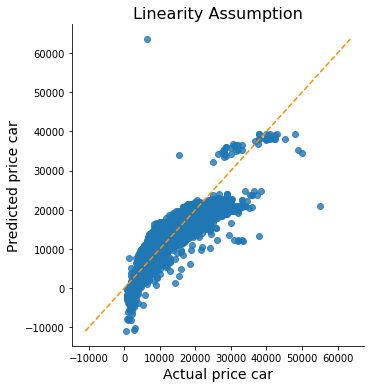

In [ ]:
# Uji Linearitas

# Plotting the observed vs predicted values
sns.lmplot(x='price', y='car_price_pred', data=nw_data, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(nw_data[['price', 'car_price_pred']].min().min()-10, 
                        nw_data[['price', 'car_price_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted price car', fontsize=14)
plt.xlabel('Actual price car', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


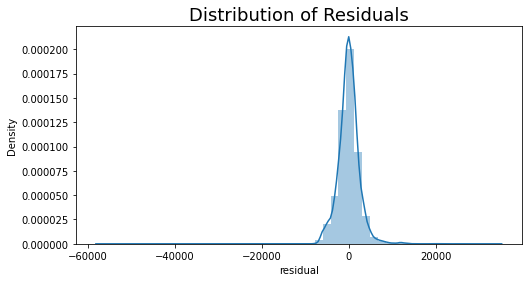

Residuals are not normally distributed


In [ ]:
# Uji Normalisasi

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(nw_data['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(nw_data['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

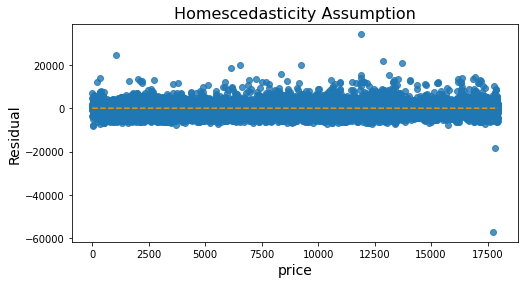

In [ ]:
# HOMOSKEDASTISITAS

# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=nw_data.index, y=nw_data.residual, alpha=0.8)
plt.plot(np.repeat(0, len(nw_data.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [ ]:
plt.style.use("ggplot")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = nw_data[['model','year','mileage','tax','mpg','engineSize']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0       model   5.310672
1        year  83.875355
2     mileage   2.838659
3         tax   6.288094
4         mpg  47.369336
5  engineSize  15.812469


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vf = ['model','year','mileage','tax','mpg','engineSize']

lm = smf.ols(formula = "price~ model+year+mileage+tax+mpg+engineSize", data = nw_data).fit()
y,X = dmatrices ("price~ model+year+mileage+tax+mpg+engineSize", data = nw_data, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vf[ = pd.DataFrame(vif)

            0
0       model
1        year
2     mileage
3         tax
4         mpg
5  engineSize


# Tambahan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

def mark_predict(th,mil,tx,pg,engine):
    # import data
    data = pd.read_csv("ford.csv")


    # encoder data
    encode = preprocessing.LabelEncoder()

    encode.fit(data.transmission.drop_duplicates())
    data.transmission = encode.transform(data.transmission)

    encode.fit(data.fuelType.drop_duplicates())
    data.fuelType = encode.transform(data.fuelType)

    encode.fit(data.model.drop_duplicates())
    data.model = encode.transform(data.model)

    #Dropping data
    data.drop(columns=['fuelType','transmission'], inplace=True)

    #Pengurutan data
    nw_data = data[['model','year','mileage','tax','mpg','engineSize','price']]


    #feature and label selection
    x = nw_data.iloc[:, 1:6].values
    y = nw_data.iloc[:, -1].values

    #Split data --> Train and split

  
    #Building model Linear regression
    lr = LinearRegression()
    lr.fit(x, y)

    #Predict
    X_test = np.array([th,mil,tx,pg,engine])
    X_test = X_test.reshape((1,-1))
    hasil = lr.predict(X_test)[0]


    return round(hasil)

mark_predict(2012,1546,140,40,2)


12575

In [ ]:
data['diagnotis'] = data['target']==1